In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv("sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [2]:
# Identifying numerical columns in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [6]:
#The Numerical columns in the data sets are- "Volume, Avg Price, Total sales value, Discount rate, Discount amount, Net Sales Value"

In [9]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_cols)

# Calculate Mean, Median, Mode, and Standard Deviation
stats = df[numerical_cols].describe().T
stats['mode'] = df[numerical_cols].mode().iloc[0]
stats[['mean', '50%', 'mode', 'std']] 

Numerical Columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


,mean,50%,mode,std
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


In [10]:
#The mean of "Avg Price, Total Sales Value, Net Sales Value" is higher than the median of those columns, therefore it indicates strong right skewness and there might be outliers present

#The standard deviation values of "Total Sales Value, Net Sales Value" are very high and it indicates high dispertion in sales 

#The mean and median values of discount rate is similar and the deviation is less 

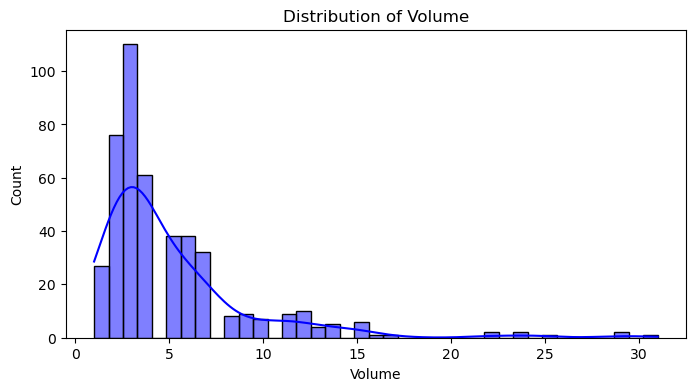

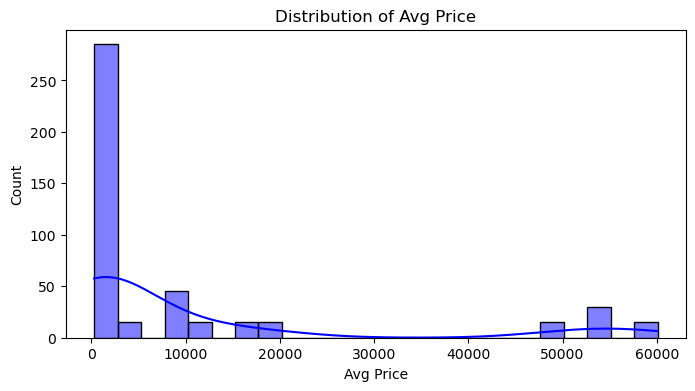

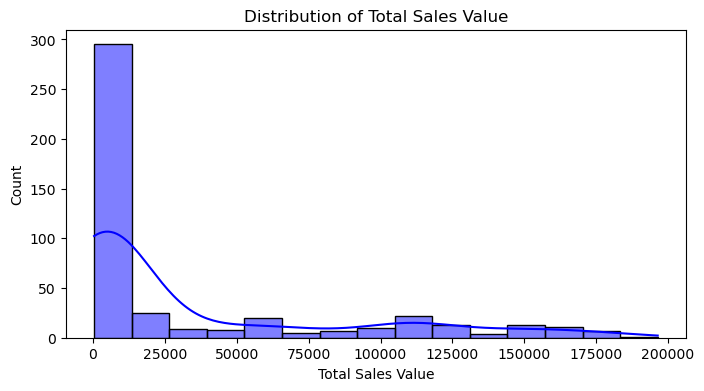

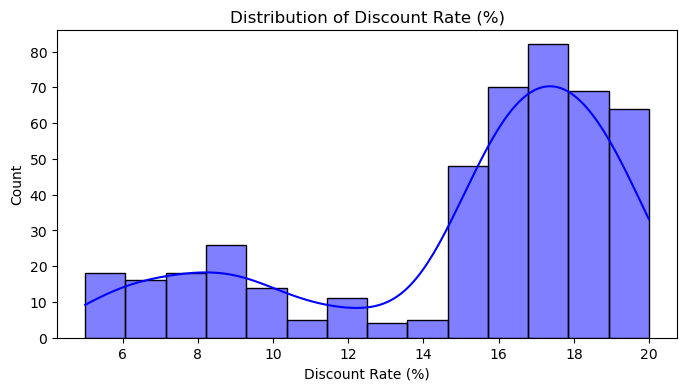

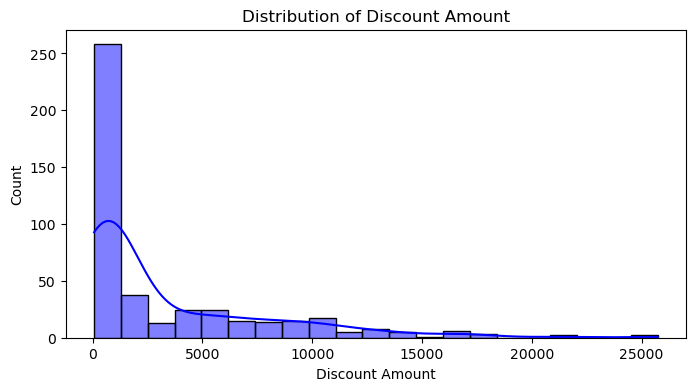

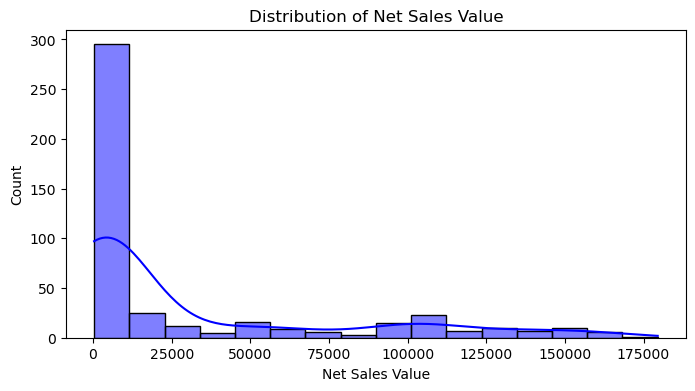

In [16]:
#histograms(Distribution Analysis)
import seaborn as sns
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True,color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

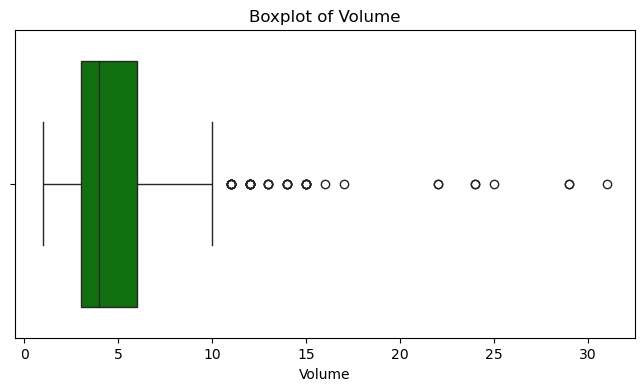

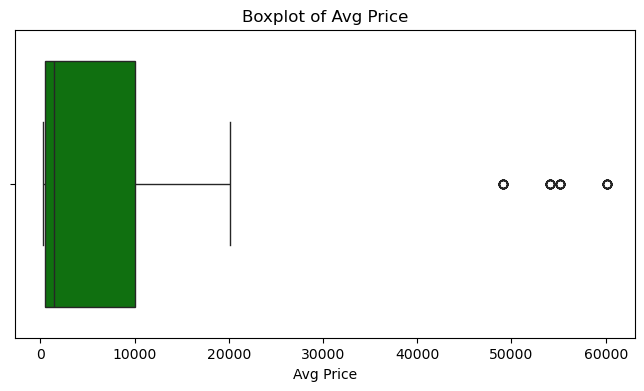

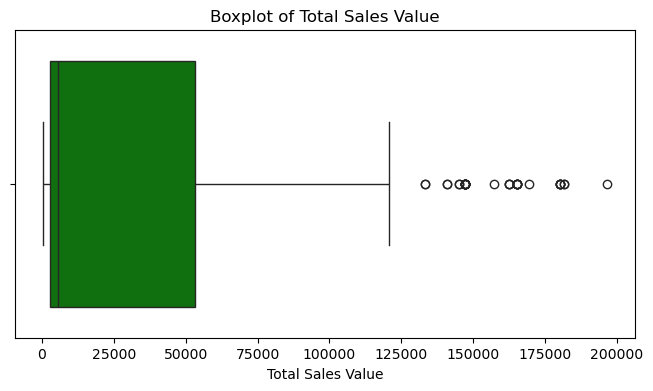

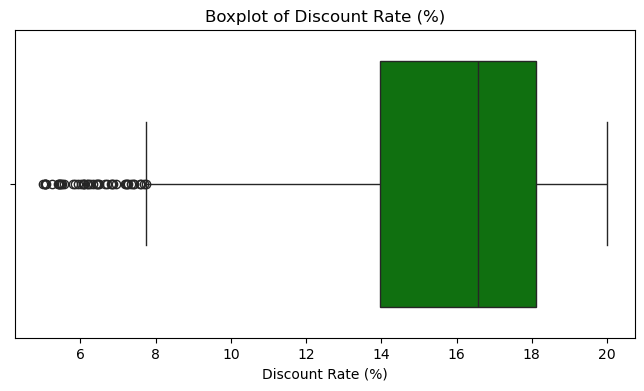

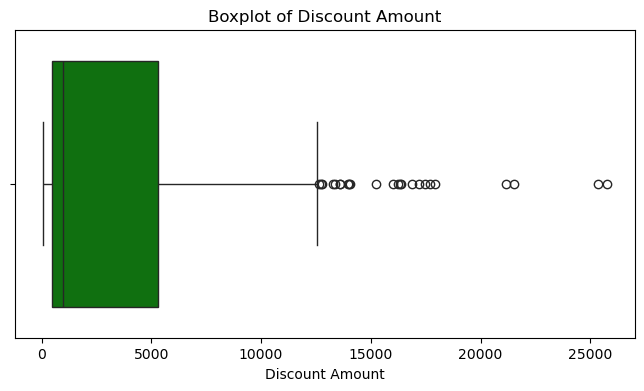

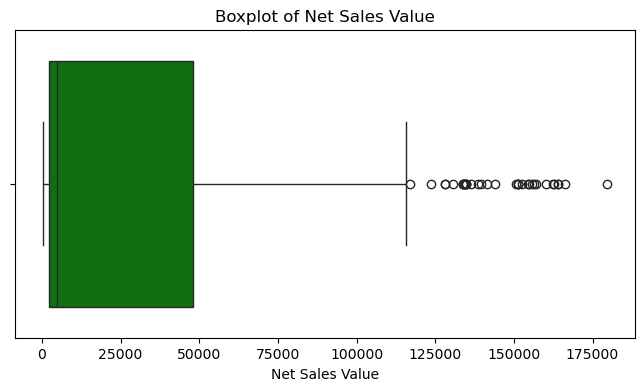

In [17]:
#boxplots(Outlier Detection)
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col],color='green')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [19]:
#The box plots for these columns will clearly show a number of extreme outliers represented by individual points far above the upper whisker.

#The box plot for discount rate show fewer or more symmetrical outliers, discounts are applied more consistently across the dataset.

#These outliers confirm the presence of high-value transactions, these outliers should be handled to make better model

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_17324\1294545865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


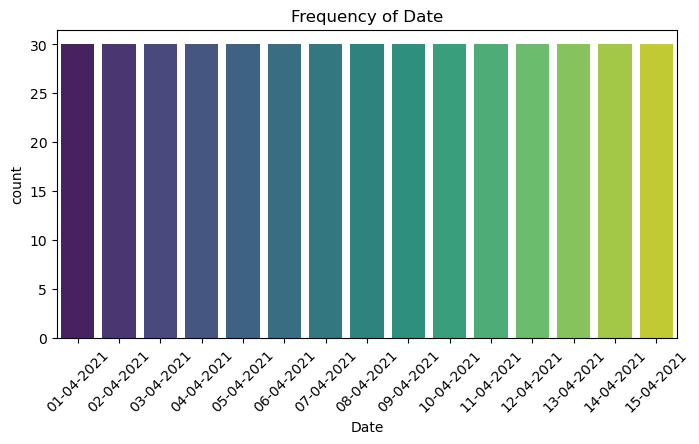

C:\Users\HP\AppData\Local\Temp\ipykernel_17324\1294545865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


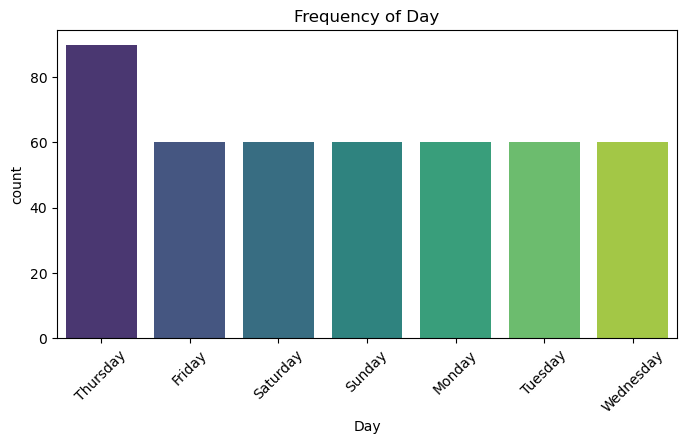

C:\Users\HP\AppData\Local\Temp\ipykernel_17324\1294545865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


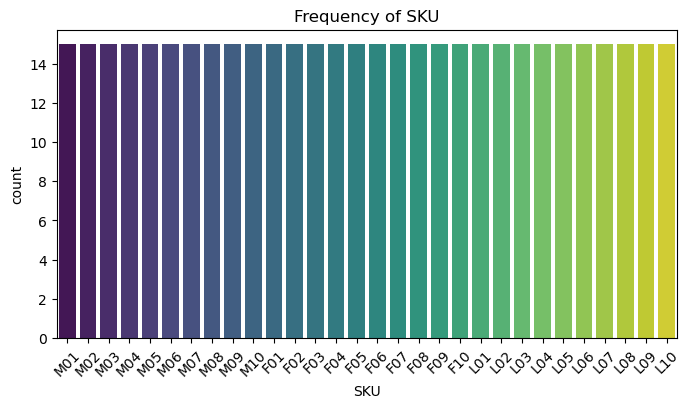

C:\Users\HP\AppData\Local\Temp\ipykernel_17324\1294545865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


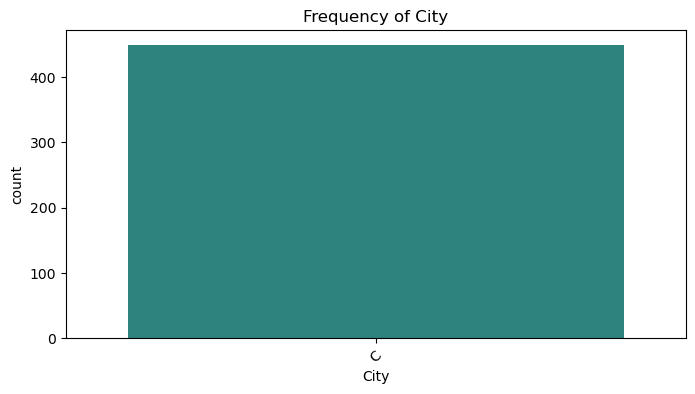

C:\Users\HP\AppData\Local\Temp\ipykernel_17324\1294545865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


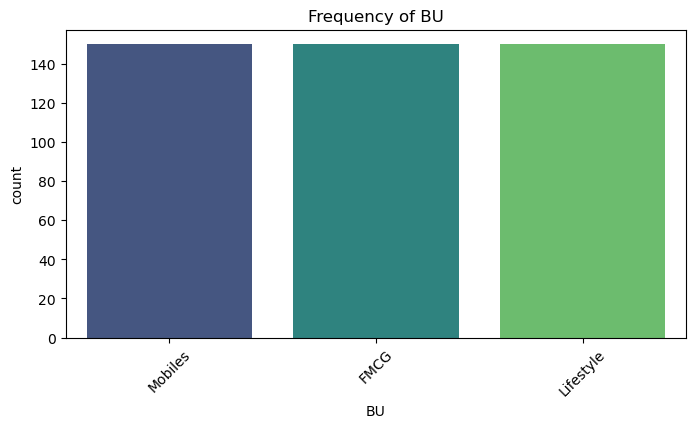

C:\Users\HP\AppData\Local\Temp\ipykernel_17324\1294545865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


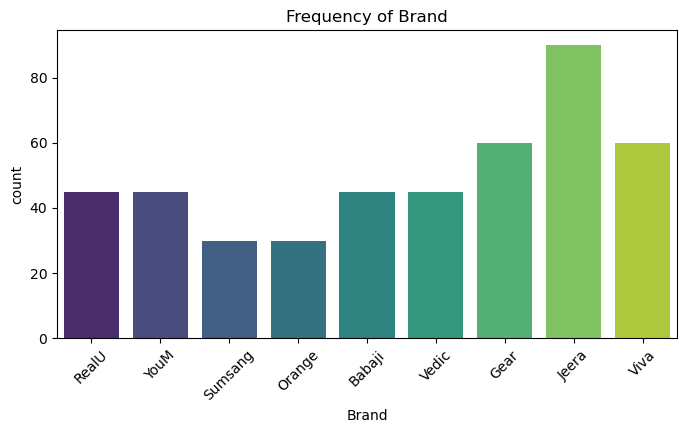

C:\Users\HP\AppData\Local\Temp\ipykernel_17324\1294545865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


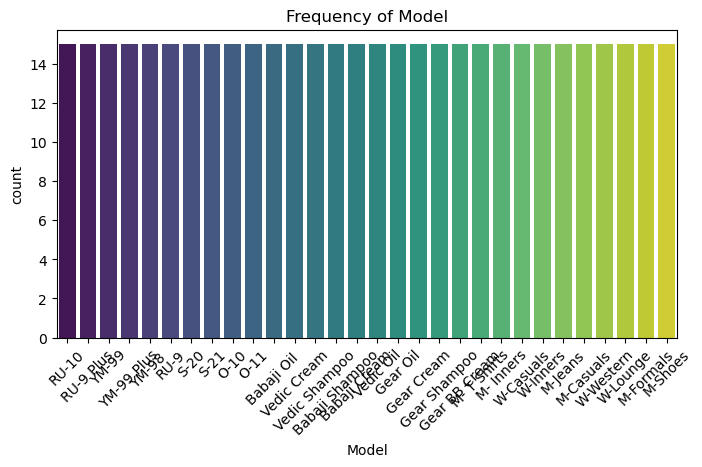

In [26]:
# Identify categorical columns (e.g., Category, Region, Product)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Frequency of {col}')
    plt.show()

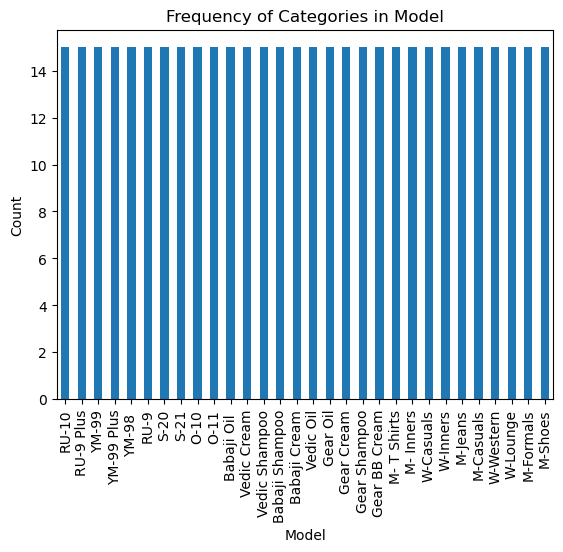

In [24]:
df['Model'].value_counts().plot(kind='bar')
plt.title("Frequency of Categories in Model")
plt.xlabel("Model")
plt.ylabel("Count")
plt.show()

In [29]:
#Analysis:-

#1. All dates have equal sales frequency.
#2. Thursday shows the highest count.
#3. All SKUs appear evenly distributed.
#4. Only one city appears.
#5. Mobiles, FMCG & Lifestyle have equal count.
#6. Jeera, Gear & Viva are top-selling brands.
#7. Model distribution is equal.

In [30]:
#Summary of the key findings from the descriptive analytics and data visualizations.

#Desciptive analytics Insights:-
#1. Moderate sales according to the volume.
#2. Average price shows both budget and high level models
#3. Discount rate is evenly spread, there is no high variation
#4. There is high difference in net sales value which is caused by difference in customer bill amounts.
#5. There is high standard deviation across the values due to high variation in pricing and sales.

#Data Visualizations:-
#1. Histogram of numerical values shows the Right skewedness due to small sales are happened and fewer very high quantity sale took place, discount rate is evenly distributed.
#2. Box plot of numerical values shows outliers on the higher end due to very high price phones are ordered
#3. Bar chart of catagorical data shows that some brands dominate sales and are highly sold, and the BU have equal quantity among all the units. Only on thursday the sale is high